In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress

In [4]:
df = pd.read_csv('./datasets/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [6]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [7]:
df.columns

Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')

In [8]:
# Use linregress function from scipy.stats to get slope and y-intercept of the line of best fit
lin_reg = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

# Use line curve formula (y = mx + c) to get best fit
y_fit = (lin_reg.slope * df.Year) + lin_reg.intercept


Text(0, 0.5, 'Sea Level (inches)')

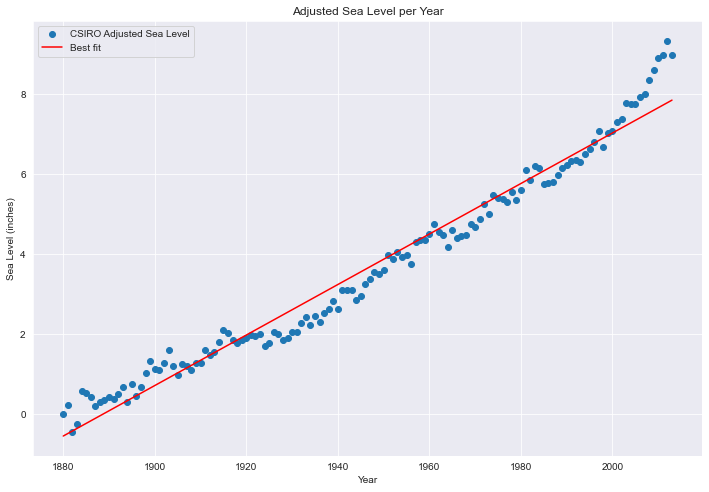

In [9]:
# Create scatter plot with Year as x-axis and the CSIRO Adjusted Sea Level as y-axix
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
plt.scatter('Year', 'CSIRO Adjusted Sea Level', data=df, label="CSIRO Adjusted Sea Level")
sns.lineplot(x='Year', y=y_fit, data=df, color="r", label="Best fit")
plt.title("Adjusted Sea Level per Year")
plt.xlabel('Year') 
plt.ylabel('Sea Level (inches)')

There is a noticeable change in pattern from the year 2000 onwards

In [10]:
# Get fitted line details (slope, intercept, rvalue, pvalue, standard error(stderr))
lin_reg

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

Text(0, 0.5, 'Sea Level (inches)')

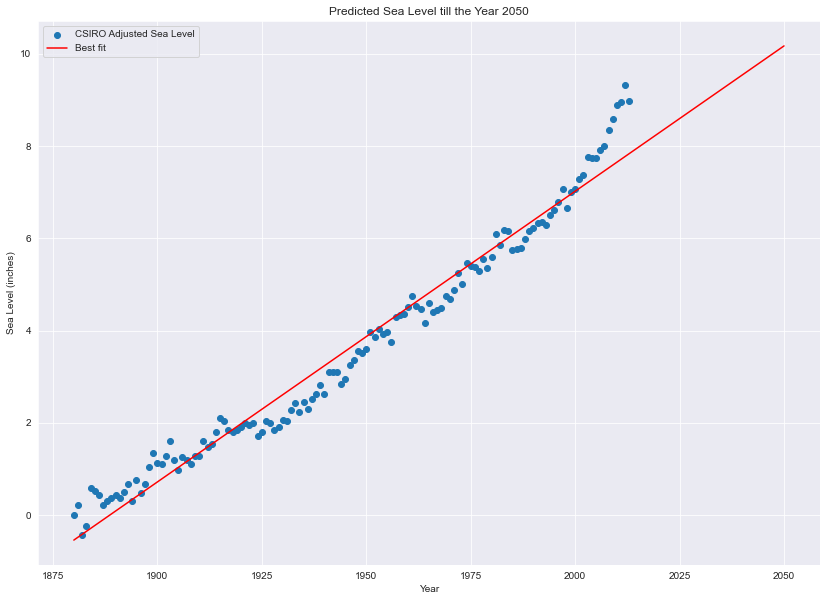

In [11]:
# Extend line of best fit to predict sea level in the year 2050
pred_2050 = pd.Series([year for year in range(1880, 2051)])
y_2050 = (lin_reg.slope * pred_2050) + lin_reg.intercept
# Plot line of best fit over scatter plot through the year 2050 to predict the sea level rise in 2050
plt.figure(figsize=(14,10))
plt.scatter('Year', 'CSIRO Adjusted Sea Level', data=df, label="CSIRO Adjusted Sea Level")
sns.lineplot(x=pred_2050, y=y_2050, data=df, color="r", label="Best fit")
plt.title("Predicted Sea Level till the Year 2050")
plt.xlabel('Year') 
plt.ylabel('Sea Level (inches)')

In [12]:
pred_sea_level_2050 = (lin_reg.slope * 2050) + lin_reg.intercept
pred_sea_level_2050

10.175455257136548

The above plot uses the current line of best fit since 1880 to predict sea level in the year 2050, which may not be ideal given the change in pattern from the year 2000. So, a new best fit could be created to reflect that change.
It can observed that the predicted sea level in the year **2050** is estimated at **10.175 inches**

Text(0.5, 1.0, 'Rise in Sea Level')

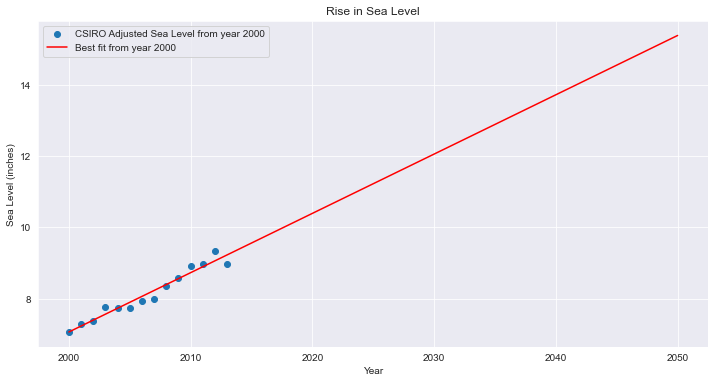

In [13]:
# New line of best fit from year 2000
df_2000 = df[df['Year'] >= 2000]
lin_reg_2000 = linregress(x=df_2000['Year'], y=df_2000['CSIRO Adjusted Sea Level'])
new_pred_2050 = pd.Series([year for year in range(2000, 2051)])
new_y_2050 = (lin_reg_2000.slope * new_pred_2050) + lin_reg_2000.intercept

# Scatter plot with adjusted best fti from year 2000
plt.figure(figsize=(12,6))
plt.scatter('Year', 'CSIRO Adjusted Sea Level', data=df_2000, label="CSIRO Adjusted Sea Level from year 2000")
sns.lineplot(x=new_pred_2050, y=new_y_2050, data=df_2000, color="r", label="Best fit from year 2000")

# Add labels and title
plt.xlabel('Year') 
plt.ylabel('Sea Level (inches)') 
plt.title ('Rise in Sea Level')

In [14]:
# get new best fit details (slope, intercept, rvalue, pvalue, standard error (stderr))
lin_reg_2000

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In [15]:
adj_pred_sea_level_2050 = (lin_reg_2000.slope * 2050) + lin_reg_2000.intercept
adj_pred_sea_level_2050

15.382443524364874

In [16]:
percent_change_pred_2050 = (adj_pred_sea_level_2050 - pred_sea_level_2050) / pred_sea_level_2050 * 100
percent_change_pred_2050

51.17204228849032

When accounting for the change in sea level pattern from the year 2000 onwards, the predicted sea level in the year **2050** is estimated to be **15.382 inches** which is an over **50%** increase from the original prediction estimated from the patterns since the year 1880 at about **10.175 inches**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f66ce99b-5ca1-471f-b32b-38b26dde2971' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>